In [1]:
import pickle

with open('trainX.pkl', 'rb') as f:
    trainX = pickle.load(f)

with open('testX.pkl', 'rb') as f:
    testX = pickle.load(f)

with open('trainY.pkl', 'rb') as f:
    trainY = pickle.load(f)

with open('testY.pkl', 'rb') as f:
    testY = pickle.load(f)

with open('valX.pkl', 'rb') as f:
    valX = pickle.load(f)

with open('valY.pkl', 'rb') as f:
    valY = pickle.load(f)

with open('le.pkl', 'rb') as f:
    le = pickle.load(f)


In [2]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, models
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Input
from tensorflow.keras.layers import Activation, Dropout,BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2021-09-12 13:29:54.894199: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
s=150
batch_size = 40
epochs = 20

In [9]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(s,s,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())


# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())


# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())


# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())


# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())


# Passing it to a dense layer
model.add(Flatten())


# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))


# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())


# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))

# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

#  output Layer 
model.add(Dense(4))

model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 35, 35, 96)        34944     
_________________________________________________________________
activation_8 (Activation)    (None, 35, 35, 96)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 96)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 17, 17, 96)        384       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 17, 256)       614656    
_________________________________________________________________
activation_9 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 256)        

In [10]:

model.compile(optimizer = keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [11]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode = 'auto',
    min_delta = 0,
    patience = 3,
    verbose = 1,
    restore_best_weights = True
)

In [12]:
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,width_shift_range=0.2, 
                         height_shift_range=0.2, shear_range=0.15,
                         horizontal_flip=True, fill_mode="nearest")

In [13]:
vgghist = model.fit(aug.flow(trainX, trainY, batch_size=batch_size), 
                     epochs=epochs,
                     callbacks = [early_stopping],
                     validation_data = (valX,valY),
                     verbose=1
)

Epoch 1/20
339/339 [==============================] - ETA: 0s - loss: 0.7184 - acc: 0.5321

2021-09-12 13:32:23.176338: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 914490000 exceeds 10% of free system memory.


339/339 [==============================] - 43s 123ms/step - loss: 0.7181 - acc: 0.5322 - val_loss: 0.6565 - val_acc: 0.3956
Epoch 2/20
339/339 [==============================] - 40s 119ms/step - loss: 0.4462 - acc: 0.6506 - val_loss: 2.7035 - val_acc: 0.3091
Epoch 3/20
339/339 [==============================] - 40s 119ms/step - loss: 0.3574 - acc: 0.7131 - val_loss: 0.5821 - val_acc: 0.5619
Epoch 4/20
339/339 [==============================] - 40s 119ms/step - loss: 0.3128 - acc: 0.7515 - val_loss: 0.6129 - val_acc: 0.4880
Epoch 5/20
339/339 [==============================] - 40s 119ms/step - loss: 0.2802 - acc: 0.7820 - val_loss: 0.3877 - val_acc: 0.7110
Epoch 6/20
339/339 [==============================] - 40s 119ms/step - loss: 0.2646 - acc: 0.7941 - val_loss: 0.6527 - val_acc: 0.5264
Epoch 7/20
339/339 [==============================] - 40s 119ms/step - loss: 0.2478 - acc: 0.8029 - val_loss: 0.2194 - val_acc: 0.8217
Epoch 8/20
339/339 [==============================] - 40s 119ms/st

In [14]:
modelLoss, modelAccuracy = model.evaluate(aug.flow(testX, testY))

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy ))



133/133 [==============================] - 12s 93ms/step - loss: 0.2569 - acc: 0.7895
Test Loss is 0.25694507360458374
Test Accuracy is 0.78951096534729


In [15]:
# classification report on test

predIdxs = model.predict(testX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

2021-09-12 13:40:08.807086: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1142910000 exceeds 10% of free system memory.


              precision    recall  f1-score   support

    Covid-19    0.76840   0.69295   0.72873       723
Lung Opacity    0.74506   0.87770   0.80596      1202
      Normal    0.87150   0.82491   0.84757      2039
   Pneumonia    0.93617   0.81784   0.87302       269

    accuracy                        0.81691      4233
   macro avg    0.83028   0.80335   0.81382      4233
weighted avg    0.82210   0.81691   0.81707      4233



In [16]:
class_names = ['Covid-19', 'Lung Opacity', 'Normal', 'Pneumonia']
y_pred = model.predict(testX)
print(class_names[np.argmax(y_pred[11])])

2021-09-12 13:40:12.459392: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1142910000 exceeds 10% of free system memory.


Lung Opacity


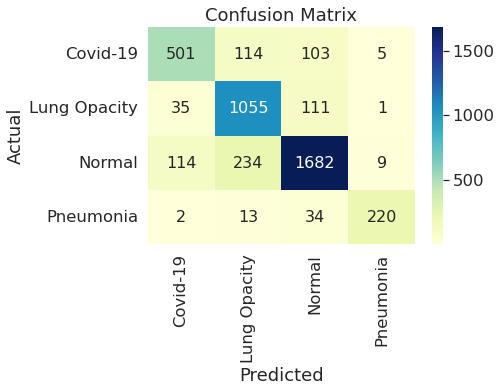

In [17]:
# Plotting Confusion Matrix
x = confusion_matrix(testY.argmax(axis=1),y_pred.argmax(axis=1))
Confusion_Matrix = pd.DataFrame(x,index=class_names, columns=class_names)

sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(Confusion_Matrix, annot=True, annot_kws={'size':16}, fmt='d', cmap='YlGnBu')

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()

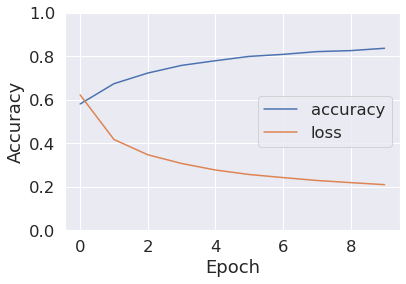

In [18]:
plt.plot(vgghist.history['acc'], label='accuracy')
plt.plot(vgghist.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='center right')


In [19]:
model.save('alexnet_model.h5') 